In [1]:
import numpy as np
import pylab as plt
import pandas as pd
import sys

sys.path.append("../")
from utils import *
from plotting import set_size

%matplotlib inline
%load_ext nb_black

<IPython.core.display.Javascript object>

Read FAST bursts and estimate the energy using burst bandwidth

In [2]:
df = pd.read_csv("../fastbursts.csv")
energy_using_bw = fluence_to_energy(df["fluence"] / 1000, df["bw"] * 1000, distance=949)
bins = np.linspace(35.5, 40, 50)

<IPython.core.display.Javascript object>

Plot

/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/numpy/ma/core.py:6849: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator


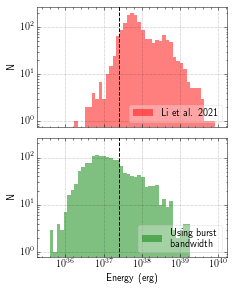

<IPython.core.display.Javascript object>

In [13]:
with plt.style.context(["science", "grid"]):  # , "no-latex"]):
    fig, ax = plt.subplots(
        2,
        1,
        sharey=True,
        sharex=True,
        figsize=set_size(width="half", subplots=(2, 1), fraction=1.0),
    )
    ax[0].hist(np.log10(df.E), bins=bins, color="r", alpha=0.5, label="Li et al. 2021")
    ax[1].hist(
        np.log10(energy_using_bw),
        bins=bins,
        color="g",
        alpha=0.5,
        label="Using burst \n bandwidth",
    )
    ax[0].legend()
    ax[1].legend()
    ax[0].set_yscale("log")
    ax[1].set_yscale("log")
    plt.tight_layout()
    ax[1].set_xlabel(r"Energy (erg)")
    ax[0].set_ylabel(r"N")
    ax[1].set_ylabel(r"N")

    for a in ax:
        legend = a.legend(fontsize="medium", loc="lower right")
        legend.get_frame().set_alpha(0.3)

    ax[0].axvline(x=np.log10(2.5) + 37, ymin=0, ymax=1000, color="k", linestyle="--")
    ax[1].axvline(x=np.log10(2.5) + 37, ymin=0, ymax=1000, color="k", linestyle="--")

    new_labels = []
    for l in ax[1].get_xticklabels():
        new_labels.append("$\\mathdefault{10^{" + l._text[-4:-2] + "}}$")
    ax[1].set_xticklabels(new_labels)

    plt.tight_layout()
    plt.savefig("fast_121102.pdf", bbox_inches="tight", dpi=300)